## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [8]:
#import libraries
import scipy
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import poisson
import matplotlib.pyplot as plt


In [3]:
#H0: The sample follows a Poisson distribution 
size = 448
observed = np.array([35, 99, 104, 110, 62, 25, 10, 3])/size

#create a Poisson distribution with the sample mean parameter = 2.435 
mean =2.435
poiss = np.array([poisson.pmf(x,mean) for x in range(7)])
poiss = np.append(poiss,1-sum(poiss))
poiss

array([0.08759775, 0.21330051, 0.25969338, 0.21078446, 0.12831504,
       0.06248942, 0.02536029, 0.01245915])

In [4]:
#use Chi square to compare observed (table) with expected Poisson results
stats.chisquare(observed, poiss)

#being the p-value close to 1 we do not reject the null hypothesis and therefore there is evidence
#of similarity between the observed and the expected observations and therefore therefore it is likely 
#that the number scores follows a poisson distribution

Power_divergenceResult(statistic=0.014489532770334417, pvalue=0.9999999972330947)

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [5]:
observed = np.array([852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063])

#we need to test if the sample follows a normal distribution (H0) --> N (985,50)
expected = stats.norm(loc = 985, scale =50)

#to test for normal dist we use Kolmogorov-Smirnov Goodness of Fit Test
stats.kstest(observed, expected.cdf)

#results show evidence for similarity with N (985,50), as we are not rejecting the H0

KstestResult(statistic=0.1581291279406798, pvalue=0.847406396427736)

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [9]:
observed = np.array([32,15,0,9,4])
label = np.array([0,1,2,3,4])
total = 60

mean_defective = sum(observed*label)/total
expected = [poisson.pmf(x, mean_defective)*total for x in range(5)]

stats.chisquare(observed, f_exp=expected)

#p-value is very small -> we reject null hypothesis 
#distribution of defective items doesn't seem to follow poisson distribution

Power_divergenceResult(statistic=37.72656768931596, pvalue=1.2759420913385983e-07)

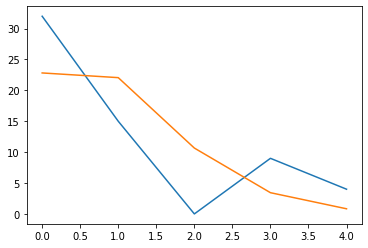

In [10]:
#let's plot it
plt.plot(observed)
plt.plot(expected)

#confirms the results above the 2 distributions don't seem very similar

## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


In [12]:
# check if the data follows a binominal distribution

observed = [138, 53, 9]

binom = [stats.binom.pmf(x, 10, 0.05) for x in range(2)]
binom.append(1 - sum(binom))
expected = [p*200 for p in binom]

stats.chisquare(observed, f_exp=expected)

# we can rejeect the H0, since p-value <0.05

Power_divergenceResult(statistic=8.30617951954273, pvalue=0.015715783395951474)

## Question 5
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [15]:
obs = np.array([32,12,14,22,6,9])
total = 95

#number sugary drinks * number of activity level x and weight to the total
expected = [52*44/total,43*44/total,52*36/total,43*36/total,52*15/total,43*15/total] 

chi_squared_statistic = sum((obs - expected)**2/expected)


alpha = 0.05
critical_value=stats.chi2.ppf(q=1-alpha,df=len(expected) - 1)

print(chi_squared_statistic)
print(critical_value)

#chi stat < critical value H0 can't be rejected

10.712198008709638
11.070497693516351
